# Data Preprocessing 1


**[실습 유의 사항]**

https://docs.google.com/spreadsheets/d/1LufpYknSbN7179sVPreZ-hDJ7vHaZ1l64XMZeivjySQ/edit?usp=sharing

공유한 파일에 실습 현황을 공유해 주세요. 수업 진행에 도움이 됩니다.

In [176]:
from sklearn import datasets, linear_model
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [194]:
from statsmodels.stats.anova import anova_lm

In [2]:
plt.rc('font', family='Malgun Gothic')

**문제1**


(1) subway.csv로 데이터 프레임을 생성합니다.

- subway.csv은 2018년 지하철 시간별 승하차 인원의 데이터입니다.

- swbway의 첫번 째 열을 사용하여 columns을 바꿔줍니다.
- subway에서 첫번째 열을 제거합니다.
- '날짜'열의 데이터를 'datetime' 자료형으로 바꿉니다.

아래 데이터프레임을 참고해서 만들어주세요.

아래 실습을 위해서 ['날짜','호선', '역명', '구분', '합 계'] 열만을 사용해서 데이터 프레임 (df)를 만들어주세요. 문제 1번은 df를 사용해 진행하면 좋습니다.


(2) 데이터 프레임을 활용하여 승하차 인원이 제일 적은 지하철 호선을 찾아보세요.

또, 호선에 따른 승하차 인원 그래프를 그려보세요. (디테일은 신경쓰지 않아도 됩니다.)

(3) 승하차 인원이 가장 많은 날과 그날의 역을 찾아보세요.

(4) 승차, 하차가 제일 많은 날,날짜,역을 찾아보세요.

(5) 전체역 중에 승하차 인원의 합이 가장 많은 역과 승하차 인원의 합을 구해보세요.

(6) 8호선에서 승하차 인원이 가장 많은 역을 찾아보세요.

(7) 승하차 차이 분석하기, 승하차 차이가 가장 많이 나는 날과, 다음날은 찾아보세요.

각 날은 무엇인가요? (검색을 통해서 찾아보세요.)

In [3]:
subway_df = pd.read_csv("subway.csv", skiprows=1)
subway_df.columns = subway_df.columns.str.replace(" ", "")
subway_df.head()

,날짜,호선,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,합계
0,2018/01/01,1호선,150,서울역,승차,373,318,365,785,1047,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
1,2018/01/01,1호선,150,서울역,하차,205,1040,872,984,1650,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
2,2018/01/01,1호선,151,시청,승차,87,105,124,197,291,...,1027,1102,1278,1163,1032,975,553,214,9,12298
3,2018/01/01,1호선,151,시청,하차,47,294,497,1017,673,...,781,702,552,388,308,236,160,100,39,10945
4,2018/01/01,1호선,152,종각,승차,604,399,191,250,370,...,2127,2172,2171,1873,1935,2084,1458,580,28,22621


In [4]:
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200750 entries, 0 to 200749
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      200750 non-null  object
 1   호선      200750 non-null  object
 2   역번호     200750 non-null  int64 
 3   역명      200750 non-null  object
 4   구분      200750 non-null  object
 5   05~06   200750 non-null  int64 
 6   06~07   200750 non-null  int64 
 7   07~08   200750 non-null  int64 
 8   08~09   200750 non-null  int64 
 9   09~10   200750 non-null  int64 
 10  10~11   200750 non-null  int64 
 11  11~12   200750 non-null  int64 
 12  12~13   200750 non-null  int64 
 13  13~14   200750 non-null  int64 
 14  14~15   200750 non-null  int64 
 15  15~16   200750 non-null  int64 
 16  16~17   200750 non-null  int64 
 17  17~18   200750 non-null  int64 
 18  18~19   200750 non-null  int64 
 19  19~20   200750 non-null  int64 
 20  20~21   200750 non-null  int64 
 21  21~22   200750 non-null  int64 
 

In [5]:
subway_df = subway_df[['날짜','호선', '역명', '구분', '합계']]
subway_df['날짜'] = pd.to_datetime(subway_df['날짜'])

In [6]:
subway_df = subway_df.set_index('날짜')

In [7]:
subway_df.head()

,호선,역명,구분,합계
날짜,,,,
2018-01-01,1호선,서울역,승차,40393
2018-01-01,1호선,서울역,하차,34730
2018-01-01,1호선,시청,승차,12298
2018-01-01,1호선,시청,하차,10945
2018-01-01,1호선,종각,승차,22621


8호선


<AxesSubplot:xlabel='호선'>

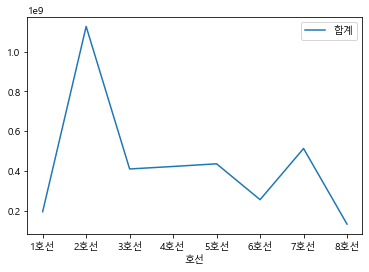

In [8]:

# print(subway_df.groupby('호선').sum())
print(subway_df.groupby('호선').sum().sort_values('합계').iloc[0].name)
subway_df.groupby('호선').sum().plot()

In [9]:
print((subway_df.resample('D').sum().sort_values('합계', ascending=False)).iloc[0].name)
print(subway_df.loc[
                    (subway_df.resample('D').sum().sort_values('합계', ascending=False)).iloc[0].name
                ].groupby('역명').sum().sort_values('합계', ascending=False).iloc[0].name)


2018-05-04 00:00:00
잠실(송파구청)


In [10]:
subway_df2 = subway_df.reset_index()
print(subway_df2.groupby(['구분']).get_group('승차').sort_values('합계', ascending=False).iloc[0])
print(subway_df2.groupby(['구분']).get_group('하차').sort_values('합계', ascending=False).iloc[0])
print()
print(subway_df2.groupby(['역명']).sum().sort_values('합계', ascending=False).iloc[0])
print(subway_df2.groupby(['역명']).sum().idxmax())

print()
print(subway_df2.groupby(['호선', '역명']).sum().loc['8호선'].sort_values('합계', ascending=False))
subway_df2.groupby(['호선', '역명']).sum().loc['8호선'].idxmax()

날짜    2018-04-07 00:00:00
호선                    2호선
역명               잠실(송파구청)
구분                     승차
합계                 138941
Name: 50978, dtype: object
날짜    2018-12-21 00:00:00
호선                    2호선
역명                     강남
구분                     하차
합계                 138378
Name: 194763, dtype: object

합계    75844902
Name: 잠실(송파구청), dtype: int64
합계    잠실(송파구청)
dtype: object

                        합계
역명                        
천호(풍납토성)          14641170
장지                13200408
암사                12751478
문정                12305513
잠실(송파구청)          11834150
남한산성입구(성남법원.검찰청)  10077851
단대오거리              7997301
강동구청               7951472
복정                 7741442
석촌                 6790870
가락시장               5841890
몽촌토성(평화의문)         5310832
산성                 4176932
송파                 3975113
수진                 3896951
신흥                 3565857
모란                 3178749


합계    천호(풍납토성)
dtype: object

구분               승차       하차       차이
날짜                                   
2018-12-31  5070806  5134123  63317.0
2018-02-15  1972211  1932804  39407.0
2018-10-06  3992023  4024851  32828.0
2018-01-30  5313295  5282660  30635.0


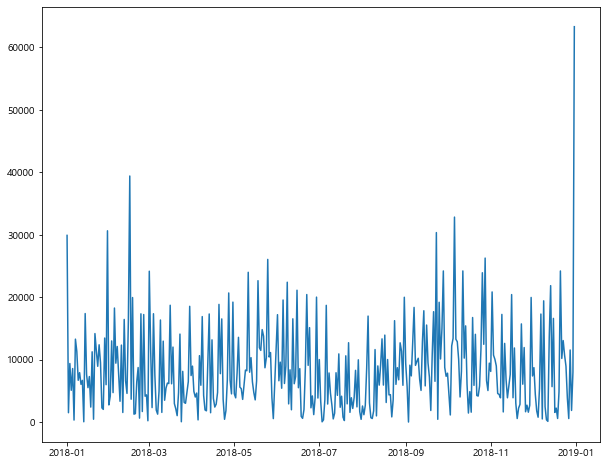

In [32]:
temp = subway_df.groupby(["날짜", "구분"])['합계'].sum().unstack()
temp['차이'] = np.fabs(temp['하차']-temp['승차'])
print(temp.sort_values('차이', ascending=False).iloc[0:4])

plt.figure(figsize=(10, 8))
plt.plot(temp['차이'])


**문제2**

(1) 2018Y.xlsx로 데이터 프레임을 생성합니다.

- 2018Y.xlsx는 2018년 날짜와 요일에 대한 데이터입니다.
- pd.read_excel()을 사용하여 데이터를 읽습니다.
- '날짜'열의 데이터를 'datetime' 자료형으로 바꿉니다.



(2) subway와 데이터프레임과 merge하여 요일별 승하차 인원이 제일 많은 요일을 구합니다.    
요일별 승하차 인원의 합을 나타낸 bar 그래프를 그려보세요. (간단하게 그립니다.)






<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      365 non-null    object
 1   공휴일여부   365 non-null    int64 
 2   사유      18 non-null     object
dtypes: int64(1), object(2)
memory usage: 11.4+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200750 entries, 2018-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   호선      200750 non-null  object
 1   역명      200750 non-null  object
 2   구분      200750 non-null  object
 3   합계      200750 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 11.7+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   승차      365 non-null    int64  
 1   하차      

<AxesSubplot:xlabel='요일'>

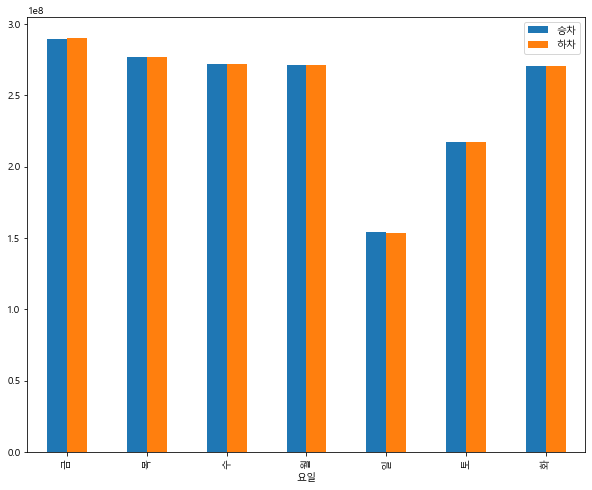

In [74]:
df_2018y = pd.read_excel('2018Y.xlsx')

df_2018y = df_2018y.set_index('날짜')
df_2018y.info()
# print(df_2018y.head())
# pd.to_datetime(df_2018y['날짜'])
subway_df.info()
temp.info()

pd.merge(df_2018y, temp, left_index=True, right_index=True)[['요일', '승차', '하차']].groupby('요일').sum().plot.bar(figsize=(10,8))

**문제3** 

'nba.csv'를 불러와 Age열에 대하여 InterQuartile Range를 이용하여 Outlier를 확인하세요. 


$$
Q1 = 25\%, Q3 = 75\%, IQR = Q3 - Q1  
$$

$$ 
[{Q1} - 1.5\times{IQR}, {Q3} + 1.5\times{IQR}] 
$$

밖의 데이터를 Outlier이라 합니다.

(1) Age의 데이터를 사용하여 다음과 같은 그림을 그려보세요. (boxplot을 사용하여 그려보세요.)

먼저, 시각적으로 Outlier가 있는지 확인보세요.

In [81]:
nba_df = pd.read_csv('nba.csv')
# nba_df.info()
# nba_df.head()
# nba_df.isna().sum()
# nba_df.isnull().sum()
# nba_df.dropna().info()
# nba_df.dropna(subset=['Age']).info()


Number          5.00
Age            24.00
Weight        200.00
Salary    1044792.25
Name: 0.25, dtype: float64

<class 'pandas.core.series.Series'>


{'whiskers': [<matplotlib.lines.Line2D at 0x21f10f3f190>,
 'caps': [<matplotlib.lines.Line2D at 0x21f10f3f8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f10f30dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x21f10f3ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f10f4a3a0>],
 'means': []}

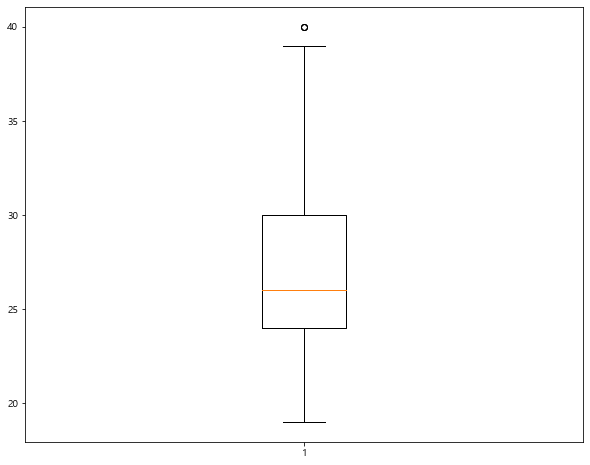

In [116]:
nba_df = nba_df.dropna(subset=['Age'])
q1 = nba_df['Age'].quantile(0.25)
q3 = nba_df['Age'].quantile(0.75)
iqr = q3 - q1
ttt = None
nba_df_age_quant = (nba_df['Age'] < (q1-1.5*iqr)) | (nba_df['Age'] > (q3+1.5*iqr))
nba_df['Outlier'] = nba_df_age_quant

print(type((nba_df['Age'] >= (q1-1.5*iqr)) & (nba_df['Age'] <= (q3+1.5*iqr))))
# nba_df[(nba_df['Age'] >= (q1-1.5*iqr)) & (nba_df['Age'] <= (q3+1.5*iqr))]['Age'].plot.box(figsize=(10,8))
# print(nba_df[nba_df.Outlier == True][["Name","Age"]])
plt.figure(figsize=(10, 8))
plt.boxplot(nba_df['Age'])

(2) Outlier가 구체적으로 무엇인지 확인해보세요.

'Outlier' 열을 생성해서, Outlier인 경우 True, 그렇지 않은 경우 False를 넣어주세요.

Outlier는 다음과 같습니다.
```
>>> print(df[df.Outlier == True][["Name","Age"]])
              Name   Age
298     Tim Duncan  40.0
304   Andre Miller  40.0
400  Kevin Garnett  40.0
```

In [119]:
nba_df.head()
print(nba_df[nba_df.Outlier == True][["Name","Age"]])

              Name   Age
298     Tim Duncan  40.0
304   Andre Miller  40.0
400  Kevin Garnett  40.0


---

**문제4**

Boston 집값의 데이터셋으로 linear regression을 하고,  distribution transformation을 한 결과를 확인하세요.

* x 값에는 LSTAT(인구 중 하위 계층비율)
* x 값에 transformation 한 결과 중 normal distribution과 비슷한 값과 비교해본다.
* y 값에는 MEDV(집값) 교안과 동일
* 실제로 linear regression을 진행하고, sqrt, log로 데이터를 변형한다.
* mean squared error 과 variance를 비교해본다.


(1) default 'LSTAT' 열의 값을 사용하여 Linear Regression을 하세요.

In [122]:
boston_housing_df = pd.read_csv('BostonHousing.csv')
boston_housing_df.info()
boston_housing_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [178]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(boston_housing_df.LSTAT.array.reshape(-1, 1), boston_housing_df.MEDV)
linear_reg.coef_, linear_reg.intercept_

(array([-0.95004935]), 34.55384087938311)

In [135]:
import statsmodels.api as sm

In [177]:
osl_model = sm.OLS.from_formula('MEDV~LSTAT', boston_housing_df)
result = osl_model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           5.08e-88
Time:                        22:37:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
LSTAT2,1.0,28404.039377,28404.039377,1000.236148,9.279886e-122
Residual,504.0,14312.256038,28.397333,NaN,NaN


(2) linear regression 모델을 사용하여 예측한 예측한 값 (plot 이용) 을 기존 데이터 (scatter 이용)와 함께 그리세요.

In [144]:
boston_housing_df['MEDV(PRED)'] = linear_reg.predict(boston_housing_df.LSTAT.array.reshape(-1, 1))


In [145]:
boston_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  CAT. MEDV   506 non-null    int64  
 15  MEDV(PRED)  506 non-null    float64
dtypes: float64(12), int64(4)
memory usage: 63.4 KB


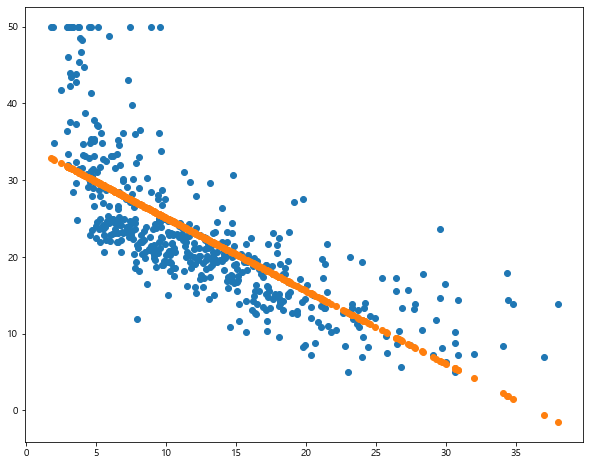

In [148]:
plt.figure(figsize=(10,8))

plt.scatter(boston_housing_df.LSTAT, boston_housing_df['MEDV'])
plt.scatter(boston_housing_df.LSTAT, boston_housing_df['MEDV(PRED)'])

<class 'numpy.ndarray'>


C:\Users\edu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


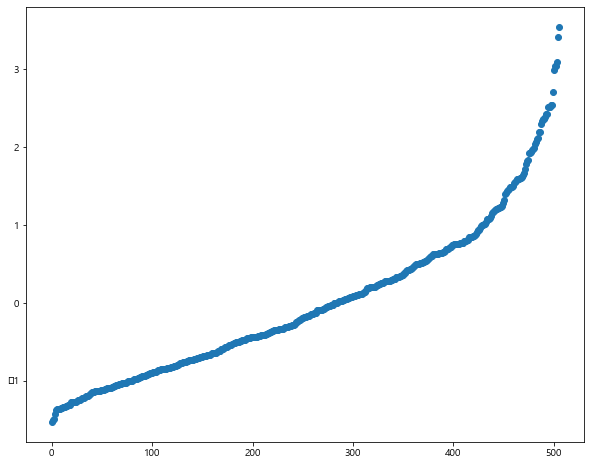

In [169]:
scaler = preprocessing.StandardScaler()
scaler.fit(boston_housing_df.LSTAT.array.reshape(-1, 1))
scaler.mean_, scaler.var_

X_ = scaler.transform(boston_housing_df.LSTAT.array.reshape(-1, 1))
print(type(X_))
X_ = X_.flatten()
X_.sort()
plt.figure(figsize=(10, 8))
plt.scatter(range(len(X_)), X_)

(3) mean square error를 구해보세요.



In [170]:
from sklearn.metrics import mean_squared_error

In [201]:
len(boston_housing_df['MEDV'])-2

504

In [202]:
mse = mean_squared_error(boston_housing_df['MEDV'], boston_housing_df['MEDV(PRED)'])#, squared=False)
print(mse, np.sqrt(mse))

6.203464131426419 2.4906754367894703



(4) x 대신 x를 log transform한 값을 사용하여 (1) ~ (3)을 반복하고, 위의 mean squre error 값과 비교하세요.

In [185]:
boston_housing_df['LSTAT2'] = np.log(boston_housing_df.LSTAT.array)


In [187]:
linear_reg_log = linear_model.LinearRegression()
linear_reg_log.fit(boston_housing_df.LSTAT2.array.reshape(-1, 1), boston_housing_df.MEDV)
linear_reg_log.coef_, linear_reg_log.intercept_

(array([-12.48097215]), 52.124756547904965)

In [188]:
boston_housing_df['MEDV(PRED_LOG)'] = linear_reg_log.predict(boston_housing_df.LSTAT2.array.reshape(-1, 1))

In [186]:
osl_model = sm.OLS.from_formula('MEDV~LSTAT2', boston_housing_df)
result = osl_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          9.28e-122
Time:                        22:39:43   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.1248      0.965     54.004      0.000      50.228      54.021
LSTAT2       -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

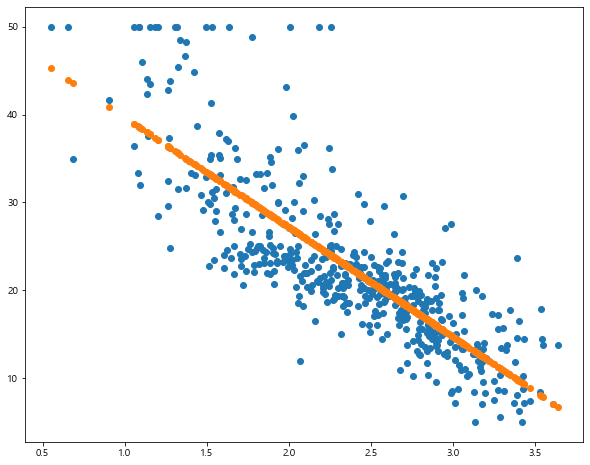

In [189]:
plt.figure(figsize=(10,8))

plt.scatter(boston_housing_df.LSTAT2, boston_housing_df['MEDV'])
plt.scatter(boston_housing_df.LSTAT2, boston_housing_df['MEDV(PRED_LOG)'])

In [192]:
mse_log = mean_squared_error(boston_housing_df['MEDV'], boston_housing_df['MEDV(PRED_LOG)'])
print(mse_log, np.sqrt(mse_log)/len(boston_housing_df['MEDV']-2))

28.285090984139796 0.010510618505916527


---